# Trackmania Project : Optimizing checkpoints order on E02

## Le projet : 
_______

Le but de notre projet était de répondre à la problématique : Quelle est la meilleure façon de parcourir les différents checkpoints d'un circuit pour le terminer le plusrapidement possible ? 

Nous nous intéressons ici au cas particulier du circuit E02 du jeu vidéo TrackMania Nations Forever

![alt text](hqdefault.jpg)

___
    
Nous nous sommes intéressés à ce circuit en particulier puisque c'est le circuit possèdant les plus de voies alternatives et de checkpoints à valider de la série de jeu TrackMania.

Pour le petit historique, plusieurs millions de joueurs essayent tant bien que mal d'inscrire leur temps dans le haut du classement de chaque circuit. De 2008 à 2019, le record de E02 n'a cessé de baisser jusqu'à atteindre les 3:48.59, record réalisé par Wirtual.

Le niveau de jeu des joueurs experts étant assez homogène, les places dans le top 100 se jouent à quelques centièmes de secondes.

Il y a de cela 10 mois, Wirtual bat son propre record du monde de plus de 14 secondes. 
Pour réaliser cet exploit, Wirtual a utilisé de noumbreux "cuts" (passage d'une partie à une autre du circuit, non prévu par les créateurs). Tous ces cuts étaient déjà largement connus parmis les meilleurs joueurs, mais il était assez compliqué de savoir si ils pouvaient ou non faire gagner du temps, et si oui dans quel ordre les prendre. 
Le nombre de cuts possibles étant trop élevé pour une recherche exhaustive, sans compter sur la difficulté de réalisation de certains d'entre eux, Wirtual décida de chronométrer tous les passages possibles et d'exprimer ce problème comme un problème de voyageur de commerce (Traveling Salesman Problem).

> Le problème du voyageur de commerce, ou problème du commis voyageur, est un problème d'optimisation qui, étant donné une liste de villes, et des distances entre toutes les paires de villes, détermine un plus court chemin qui visite chaque ville une et une seule fois et qui termine dans la ville de départ. 

Ici, les villes constitueront les checkpoints et la distance sera définie comme le temps nécessaire pour aller d'un checkpoint à un autre. Nous pouvons noter qu'il s'agit d'un problème dit TSP asymétrique puisque il n'est pas toujours possible de faire la jonction entre deux checkpoints dans les deux sens.

Notre objectif dans ce projet est donc d'essayer de réaliser la même étude, en s'appuyant sur différentes méthodes de résolution, à savoir : l'algorithme de Little (Branch and Bound) et une modélisation du problème sous forme de Programmation Linéaire en Nombres Entiers

## L'avancement du projet
____

$$Rendu\ intermédiare$$
Nous avons décider d'organiser notre travail dans l'odre suivant : 
* **Obternir un version fonctionnelle avec l'algorithe de Little, sur l'exemple du polycopié**
* **Réussir à importer nos données depuis un fichier csv pour faciliter l'importation des temps**
* **Tester l'algorithme de Little sur un circuit de notre cru (Avec peu de checkpoints)**
* **Obtenir une version fonctionnelle de la version PLNE (Miller-Tucker-Zemlin)**
* Obtenir une version fonctionnelle de la version PLNE (Dantzig-Fulkerson-Johnson)
* Récupérer les données de temps du circuit E02
* Importer les données de temps du circuit E02
* Comparer les temps d'éxécution et les résulats de nos différentes approches sur les données de E02
* Comparaison générale des 3 approches
* Optionnel : Test des algorithmes génétiques / fourmillière de résolution de TSP, même si la taille de notre problème ne s'y prête pas vraiment
* Tentative de record du monde par Hugo

Comme vous pourrez être amené à le voir ci-dessous, une majorité des étapes les plus difficiles a déja été réalisée. L'algorithme de Little et la formulation PLNE (M-T-Z) semblent parfaitement fonctionner sur les différents exemples que nous leur avons passés.

Nous avons choisi l'approche "dictionnaire" plutôt que l'approche matricielle pour la description puLp du problème, puisque contrairement à un problème TSP plus "classique", une majorité des trajets ne peut pas être réalisé dans un temps raisonnable. Une modélisation matricielle aurait défini beaucoup de contraintes inutiles et complexifié notre problème.

Finalement, nous allons passer les prochains jours à nous atteler à la modélisation (D-F-J) du modèle PLNE et à la comparaison de nos différentes méthodes.

Le fait que la majorité des trajets ne soit pas possible semble "diminuer la complexité" de l'algorithme de Little et nous avons été agréablement surpris du peu de branches explorées pour la résolution de notre exemple jouet à 8 checkpoints. Alors que l'algorithme est censé exploser en complexité bien avant la marque des 26 villes, nous sommes pressés de voir si l'algorithme parviendra tout de même à trouver le meilleur chemin

Comme écrit dans la liste des tâches, nous essaierons également d'effectuer quelques tests d'algorithmes de résolution génétiques, bien que notre problème soit de taille assez faible pour être résolu de manière exacte en un temps convenable

___ 

$$Rendu\ final$$
Voici l'avancement des tâches depuis le dernier rendu : 
* **Obternir un version fonctionnelle avec l'algorithe de Little, sur l'exemple du polycopié**
* **Réussir à importer nos données depuis un fichier csv pour faciliter l'importation des temps**
* **Tester l'algorithme de Little sur un circuit de notre cru (Avec peu de checkpoints)**
* **Obtenir une version fonctionnelle de la version PLNE (Miller-Tucker-Zemlin)**
* **Obtenir une version fonctionnelle de la version PLNE (Dantzig-Fulkerson-Johnson)**
* **Récupérer les données de temps du circuit E02**
* **Importer les données de temps du circuit E02**
* **Comparer les temps d'éxécution et les résulats de nos différentes approches sur les données de E02**
* **Comparaison générale des 3 approches**
* Optionnel : Test des algorithmes génétiques / fourmillière de résolution de TSP, même si la taille de notre problème ne s'y prête pas vraiment
* Tentative de record du monde par Hugo

Depuis le rendu intermédiaire, nous avons travaillé sur la résolution de problème initial, à savoir le speedrun de E02, et corrigé queqlues algorithmes.
Dans un premier temps nous avons réussi à récupérer tous les temps chronométrés du circuit en question. Le fichier étant au format excel et à la configuration très peu arrangeante, nous avons modifié le tout afin de le rendre exploitable pour nos algorithmes de résolution. 
Une fois les temps chargés en format matrice, nous avons pu nous rendre compte que notre Algorithme de Little n'était pas correct, de même que notre fonction d'affichage du résultat. Les deux problèmes étaient liés au calcul de la profondeur du chemin emprunté, faussés par le fait qu'un non-choix augmentait également la profondeur de l'arbre.
La fonction getRealNodeDepth nous a permis de résoudre ces deux problèmes

# Branch and Bound Algorithm (Little)

## > Dependencies

In [1]:
import time
import numpy as np
from treelib import Node, Tree #You can pip install treelib
from itertools import chain, combinations
import pandas as pd

## > Defining functions

In [2]:
def matrixReduction(matrix):
    red_matrix = np.copy(matrix)
    n = red_matrix.shape[0]
    evaluation = 0
    
    for j in range(n):
        if(np.min(red_matrix[:,j])!= np.inf):
            evaluation += np.min(red_matrix[:,j])
            red_matrix[:,j] = red_matrix[:,j] - np.min(red_matrix[:,j])

    for i in range(n):
        if(np.min(red_matrix[i,:])!= np.inf):
            evaluation += np.min(red_matrix[i,:])
            red_matrix[i,:] = red_matrix[i,:] - np.min(red_matrix[i,:])
            
    return (red_matrix, evaluation) 

In [3]:
def calculerRegret(i,j, matrix):
    mat_cout = np.copy(matrix)
    mat_cout[i,j] = np.inf
    cout = np.min(mat_cout[i,:])
    cout += np.min(mat_cout[:,j])
    return cout

In [4]:
def visitNode(n, matrix, e, unavailable,parent_id):
    
    global maxi
    global tree
    global node_id
    global nodes
    root = nodes[0]
    s = tree.get_node(parent_id).tag #gets the name of the parent node
    
    if(e<=maxi):
        
        if(n != 0 or s[:len(root)] == root): #check if the parent node is the root
            
            availableNodes = np.where(matrix[n,:]!=np.inf)[0]
            regrets = {}
            change = False
            
            for node in availableNodes:
                if(node!=unavailable):
                    regrets[node] = calculerRegret(n,node, matrix)
                    change = True
            
            if(change):
                
                
                maxRegret = int(max(regrets, key=regrets.get)) #Retourne la clé de la valeur max
                
                new_matrix = np.copy(matrix)
                new_matrix[n,:] = np.inf
                new_matrix[:,maxRegret] = np.inf
                new_matrix[maxRegret,n] = np.inf
                
                new_matrix_2 = np.copy(matrix)
                new_matrix_2[n,maxRegret] = np.inf
                
                (new_matrix, coutevaluation) = matrixReduction(new_matrix)
                (new_matrix_2, coutevaluation2) = matrixReduction(new_matrix_2)
                
                localid = int(node_id)
                #________V__________
                e_v = e + coutevaluation
                
                node_id += 1
                tree.create_node(nodes[maxRegret]+' '+str(e_v), node_id, parent=localid, data=e_v)
                if(node_id<10000000):               
                    visitNode(maxRegret,new_matrix,e_v,None,localid)
                
                #______Vbarre_______
                e_v_barre = e + regrets[maxRegret]
                node_id += 1
                tree.create_node(nodes[n]+'!'+nodes[maxRegret]+' '+str(e_v_barre), node_id, parent=localid, data=e_v_barre)
                if(node_id<10000000):          
                    visitNode(n,new_matrix_2, e_v_barre,None,localid)

        else:
            if (getRealNodeDepth(tree,parent_id)>26):
                maxi = min(maxi,e)
                print(parent_id)

In [5]:
#Fonction appelant l'algorithe de résolution de Little
def Little(matrix, racine):
    
    global maxi
    global tree
    global node_id

    localid = int(node_id)
    
    n=racine
    (matrix, e) = matrixReduction(matrix)
    unavailable = None #Réduire la matrice et calculer E
    
    tree.create_node(nodes[n], node_id)
    
    visitNode(n,matrix, e,None, localid) #Visiter la racine

In [6]:
#Affichage du meilleur chemin
def Path(tree):
    
    global nodes
    
    minimum = np.inf
    min_node = None
    for node in tree.all_nodes_itr():
        if(node.tag[:len(nodes[0])]==nodes[0] and node.data != None and node.tag[len(nodes[0])]!="!" and node.tag[len(nodes[0])+1] != "!"):
            if(node.data <= minimum and getRealNodeDepth(tree,node) > len(nodes)):
                minimum = node.data
                min_node = node


    depth = tree.depth(min_node)
    node = min_node
    path = [min_node.tag.split(' ')[0]]
    #print('min node :', min_node)
    
    for i in range(depth):
        node = tree.parent(node.identifier)
        #print(node)
        if("!" not in node.tag):
            path.append(node.tag.split(' ')[0])
    path.reverse()
    
    print('Found optimal tour!')
    print(' -> '.join(path))
    print('Total cost : {}s'.format(min_node.data))
    
    #return (path, min_node.data)

In [7]:
def getRealNodeDepth(tree,node):
    if(type(node)==int):
        node = tree.get_node(node)
    depth = tree.depth(node)
    compteur = 1
    for i in range(depth):
        node = tree.parent(node.identifier)
        if("!" not in node.tag):
            compteur +=1
    return compteur

## > Testing

### >> Textbook example

Cet exemple est directement tiré de l'énoncé du projet. Il nous a servi de premier test pour l'algorithme de Little et nous a permis de vérifer que ce dernier continuait de bien fonctionner au fur et à mesure que nous corrigions d'autres problèmes.

Quoi que toujours utile, ce TSP ne correspond pas exactement à la forme de notre problème : Les distances sont symétriques et tous les sommets sont accessibles depuis n'importe lequel de ses voisins.

**Meilleur chemin : Bordeaux -> Lyon -> Paris -> Nantes -> Bordeaux**
___

<img src="cities.png" alt="drawing" width="600"/>

In [8]:
maxi = np.inf
costs = np.array([[maxi,780,320,580],
                 [780,maxi,700,460],
                 [320,700,maxi,380],
                  [580,460,380,maxi]])
nodes = ['Bordeaux','Lyon','Nantes','Paris']

In [9]:
tree = Tree()
node_id = 1

%time Little(costs,0)

Wall time: 5 ms


In [10]:
Path(tree)

Found optimal tour!
Bordeaux -> Lyon -> Paris -> Nantes -> Bordeaux
Total cost : 1940.0s


### >> Toy example

Ce deuxième exemple dit "exemple jouet" nous sert également d'exemple de test afin de tester le bon fonctionnement de nos algorithmes sans se lancer directement dans des problèmes lourds en calcul.
L'idée générale était de modéliser un circuit possible, où une majorité des sommets serait inaccessibles depuis un sommet donné. 

De plus, la résolution d'un problème TSP consiste à trouver une boucle de plus faible coût passant par tous les sommets. Notre circuit de voiture n'étant pas un circuit bouclant (le checkpoint final est différent du checkpoint de départ), nous avons décider de modéliser le problème en laissant un unique arc de retour jusqu'au checkpoint de départ, de coût nul, et prenant son origine dans le checkpoint d'arrivée.

**Meilleur chemin : 1 -> 2 -> 3 -> 5 -> 4 -> 7 -> 6 -> 8**
___

<img src="toyexample_nicer.png" alt="drawing" width="600"/>

In [11]:
costs = np.array([[maxi,10,maxi,maxi,maxi,maxi,maxi,maxi],
                 [maxi,maxi,10,25,maxi,maxi,maxi,maxi],
                 [maxi,10,maxi,15,5,7,maxi,maxi],
                 [maxi,25,15,maxi,5,maxi,4,maxi],
                 [maxi,maxi,5,5,maxi,15,20,maxi],
                 [maxi,maxi,7,maxi,15,maxi,5,6],
                 [maxi,maxi,maxi,4,20,5,maxi,10],
                 [0,maxi,maxi,maxi,maxi,maxi,maxi,maxi]])
nodes = [str(i+1) for i in range(8)]

In [12]:
tree = Tree()
node_id = 1

%time Little(costs,0)

Wall time: 51 ms


In [13]:
Path(tree)

Found optimal tour!
1 -> 2 -> 3 -> 5 -> 4 -> 7 -> 6 -> 8 -> 1
Total cost : 45.0s


### >> From csv

In [14]:
costs = np.genfromtxt('./matrices/villes.csv', delimiter=';')
costs = np.array(costs, dtype=float)

In [15]:
costs = np.nan_to_num(costs, nan=np.inf)
nodes = ['Bordeaux','Lyon','Nantes','Paris']

In [16]:
costs

array([[ inf, 780., 320., 580.],
       [780.,  inf, 700., 460.],
       [320., 700.,  inf, 380.],
       [580., 460., 380.,  inf]])

In [17]:
maxi = np.inf
tree = Tree()
node_id = 1

%time Little(costs,0)

Wall time: 7 ms


In [18]:
tree.show()

Bordeaux
├── Bordeaux!Nantes 1820.0
│   ├── Bordeaux!Paris 1940.0
│   │   ├── Bordeaux!Lyon inf
│   │   └── Lyon 1940.0
│   │       ├── Lyon!Paris 2180.0
│   │       │   ├── Lyon!Nantes inf
│   │       │   └── Nantes 2440.0
│   │       │       ├── Nantes!Paris inf
│   │       │       │   ├── Bordeaux inf
│   │       │       │   └── Nantes!Bordeaux inf
│   │       │       └── Paris 2440.0
│   │       │           ├── Bordeaux 2440.0
│   │       │           └── Paris!Bordeaux inf
│   │       └── Paris 1940.0
│   │           ├── Nantes 1940.0
│   │           │   ├── Bordeaux 1940.0
│   │           │   └── Nantes!Bordeaux inf
│   │           └── Paris!Nantes inf
│   │               ├── Bordeaux inf
│   │               └── Paris!Bordeaux inf
│   └── Paris 2060.0
│       ├── Lyon 2060.0
│       │   ├── Lyon!Nantes inf
│       │   │   ├── Bordeaux inf
│       │   │   └── Lyon!Bordeaux inf
│       │   └── Nantes 2060.0
│       │       ├── Bordeaux 2060.0
│       │       └── Nantes!Bordeaux inf


In [19]:
Path(tree)

Found optimal tour!
Bordeaux -> Lyon -> Paris -> Nantes -> Bordeaux
Total cost : 1940.0s


**Conclusion :** L'algorithme de Little semble fonctionner très correctement sur des problèmes de petite taille. La résolution est quasi instantanée et nous avons été agréablement surpris du peu de branches explorées, dû  à la forme du problème. 

Cela nous donne de bons espoirs quant à la possibilité de résoudre notre problème à 26 checkpoints, malgré que l'algorithme de Little soit censé exploser en complexité bien avant les 26 noeuds

# Integer Linear Programming

Nous allons maintenant mettre en place des méthodes de PLNE afin de résoudre notre problème voyageur de checkpoints. 

Nous utiliserons ici deux modélisations différentes : 

* La modélisation Miller-Tucker-Zemlin
* La modélisation Dantzig-Fulkerson-Johnson

On se doute d'ores et déjà que la seconde modélisation sera très rapidement impossible à faire tourner, puisque le nombre de contraintes augmente de façon exponentielle. Il pourra cependant être intéressant de comparer l'efficacité des deux modèles sunr des instances plus petites du problème. 

In [20]:
from pulp import *

In [21]:
nodes = [i for i in range(8)]
maxi = np.inf
costs = np.array([[maxi,10,maxi,maxi,maxi,maxi,maxi,maxi],
                 [maxi,maxi,10,25,maxi,maxi,maxi,maxi],
                 [maxi,10,maxi,15,5,7,maxi,maxi],
                 [maxi,25,15,maxi,5,maxi,4,maxi],
                 [maxi,maxi,5,5,maxi,15,20,maxi],
                 [maxi,maxi,7,maxi,15,maxi,5,6],
                 [maxi,maxi,maxi,4,20,5,maxi,10],
                 [0,maxi,maxi,maxi,maxi,maxi,maxi,maxi]])

## Miller-Tucker-Zemlin 

In [22]:
def solveILP_MTZ(nodes, costs , maxi):
    
    distances = dict(((i,j),costs[i,j]) for i in nodes for j in nodes if i!=j and costs[i,j] != maxi )
    
    prob = LpProblem('TrackmaniaSalesmanProblem', LpMinimize) #Define the problem
    
    x = LpVariable.dicts('x',distances, 0,1,LpBinary) #Decision variables
    
    #The objective
    cost = lpSum([x[(i,j)]*distances[(i,j)] for (i,j) in distances])
    prob+=cost
    
    #Constraints
    for k in nodes:
        #every site has exactly one inbound connection
        prob+= lpSum([ x[(i,k)] for i in nodes if (i,k) in x]) ==1
        #every site has exactly one outbound connection
        prob+=lpSum([ x[(k,i)] for i in nodes if (k,i) in x]) ==1
        
    #We need to keep track of the order in the tour to eliminate the possibility of subtours
    u = LpVariable.dicts('u', nodes, 0, len(nodes)-1, LpInteger)
    
    #Subtour elimination
    N=len(nodes)
    for i in nodes:
        for j in nodes:
            if i != j and (i != 0 and j!= 0) and (i,j) in x:
                prob += u[i] - u[j] <= (N)*(1-x[(i,j)]) - 1
                
    %time prob.solve()
    print(LpStatus[prob.status])

    #Best tour print
    nodes_left = nodes.copy()
    org = 0
    tour=[]
    tour.append(nodes_left.pop( nodes_left.index(org)))

    final_cost = 0
    
    while len(nodes_left) > 0:

        for k in nodes_left:
            try :
                if x[(org,k)].varValue ==1:
                    tour.append( nodes_left.pop( nodes_left.index(k)))
                    final_cost += costs[org,k]
                    org=k
                    break
            except:
                pass

    tour.append(0)

    tour_legs = [distances[(tour[i-1], tour[i])] for i in range(1,len(tour))]

    print('Found optimal tour!')
    tour_str = [str(tour[i]) for i in range(len(tour))]
    print(' -> '.join(tour_str))
    print('Total cost : {}s'.format(final_cost))

In [23]:
solveILP_MTZ(nodes, costs, maxi)

Wall time: 26 ms
Optimal
Found optimal tour!
0 -> 1 -> 2 -> 4 -> 3 -> 6 -> 5 -> 7 -> 0
Total cost : 45.0s


## Dantzig–Fulkerson–Johnson

In [24]:
def solveILP_DFJ(nodes, costs , maxi):
    
    distances = dict(((i,j),costs[i,j]) for i in nodes for j in nodes if i!=j and costs[i,j] != maxi )
    
    prob = LpProblem('TrackmaniaSalesmanProblem', LpMinimize) #Define the problem
    
    x = LpVariable.dicts('x',distances, 0,1,LpBinary) #Decision variables
    
    #The objective
    cost = lpSum([x[(i,j)]*distances[(i,j)] for (i,j) in distances])
    prob+=cost
    
    #Constraints
    for k in nodes:
        #every site has exactly one inbound connection
        prob+= lpSum([ x[(i,k)] for i in nodes if (i,k) in x]) ==1
        #every site has exactly one outbound connection
        prob+=lpSum([ x[(k,i)] for i in nodes if (k,i) in x]) ==1
        
    
    #Subtour elimination         
    for subset in powerset(nodes):
        if(len(subset)>=2 and len(subset)<=len(nodes)-1):
            prob += lpSum([ x[(i,j)] for i in subset for j in subset if i!=j and costs[i,j] != maxi]) <= len(subset)-1
            
    %time prob.solve()
    print(LpStatus[prob.status])
    
    
    #Best tour print
    nodes_left = nodes.copy()
    org = 0
    tour=[]
    tour.append(nodes_left.pop( nodes_left.index(org)))
    
    final_cost = 0 
    
    while len(nodes_left) > 0:

        for k in nodes_left:
            try :
                if x[(org,k)].varValue ==1:
                    tour.append( nodes_left.pop( nodes_left.index(k)))
                    final_cost += costs[org,k]
                    org=k
                    break
            except:
                pass

    tour.append(0)

    tour_legs = [distances[(tour[i-1], tour[i])] for i in range(1,len(tour))]

    print('Found optimal tour!')
    tour_str = [str(tour[i]) for i in range(len(tour))]
    print(' -> '.join(tour_str))
    print('Total cost : {}s'.format(final_cost))

In [25]:
def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

In [26]:
solveILP_DFJ(nodes, costs, maxi)

Wall time: 35 ms
Optimal
Found optimal tour!
0 -> 1 -> 2 -> 4 -> 3 -> 6 -> 5 -> 7 -> 0
Total cost : 45.0s


**Conclusion :** Nos deux algorithmes fonctionnent correctement sur notre exemple jouet et s'exécutent en un temps comparable. On notera également que tous les algorithmes retournent la même réponse, ce qui est plutôt rassurant quant à la bonne qulité de ces derniers

# Get Real Data in

In [27]:
maxi = 30
data = pd.read_excel('./matrices/Données checkpoints E02.xlsx', index_col=0)[0:27].fillna(maxi)

In [28]:
data[data == 30.00] = np.inf
data[data == 0.00] = np.inf
data.iloc[26][0] = 0
data

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
Checkpoints,,,,,,,,,,,,,,,,,,,,,
0,inf,9.65,inf,18.23,13.19,9.17,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,9.77,16.66,inf
1,inf,inf,4.43,9.50,5.09,8.84,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,8.56,21.64,8.55
2,inf,4.25,inf,13.75,9.40,13.35,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,7.63,17.21,12.80
3,inf,9.87,14.42,inf,12.62,17.17,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,12.91,inf,16.27
4,inf,4.89,5.76,12.42,inf,10.23,13.65,7.14,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,8.99,inf,11.33
5,inf,8.87,7.60,inf,10.10,inf,11.87,9.78,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,10.83,11.01,17.17
6,inf,7.01,11.71,inf,8.35,12.49,inf,14.13,inf,inf,...,10.61,inf,inf,inf,inf,inf,inf,inf,inf,15.10
7,inf,6.76,9.18,11.39,3.42,10.30,14.42,inf,8.57,10.09,...,inf,inf,inf,inf,9.54,inf,6.89,7.49,inf,inf
8,inf,inf,inf,inf,inf,inf,inf,9.14,inf,11.73,...,inf,3.22,inf,inf,inf,inf,9.00,inf,inf,inf


## > Solve with Little

Comme nous ne pouvions pas forcément nous y attendre, l'algorithme de Little est tout à fait capable de résoudre notre problème de voyageur de checkpoints à 26 sommets. 

La résolution du problème est loin d'être rapide (Environ 5 minutes sur nos machines) mais le chemin retourné est correct et correspond exactement au résultat obtenu par Wirtual, que nous essayons de reproduire ici. 

In [29]:
costs = data.values.astype(float)
nodes = [str(i) for i in range(27)]

In [30]:
maxi = np.inf
tree = Tree()
node_id = 1

#%time Little(costs,0)

In [31]:
#Path(tree)

## > Solve with ILP

Là où l'algorithme de Little a commencé à exploser en complexité lors de la résolution de ce problème, la modélisation sous forme de programme linéaire en nombres entiers "Miller-Tucker-Zemlin" s'exécute toujours en un temps remarquablement court. 

Il est encore une fois intéressant de noter la bonne concordance des nos résultats sur ces deux approches différentes

In [32]:
maxi = 30
data = pd.read_excel('./matrices/Données checkpoints E02.xlsx', index_col=0)[0:27].fillna(maxi)
data[data == 0.00] = maxi
data.iloc[26][0] = 0
costs = data.values
nodes = [i for i in range(27)]

In [33]:
solveILP_MTZ(nodes, costs, maxi)

Wall time: 1.24 s
Optimal
Found optimal tour!
0 -> 5 -> 2 -> 14 -> 24 -> 23 -> 3 -> 1 -> 4 -> 7 -> 12 -> 9 -> 10 -> 11 -> 8 -> 18 -> 19 -> 17 -> 20 -> 13 -> 16 -> 21 -> 22 -> 6 -> 15 -> 25 -> 26 -> 0
Total cost : 177.07999999999998s


Contrairement à notre autre modélisation PLNE, le modèle Dantzig–Fulkerson–Johnson n'est pas caoable de résoudre un problème de cette (faible) taille.

In [34]:
#solveILP_DFJ(nodes, costs, maxi)

# Performance comparison

___ 

La résolution de notre problème initial ci-dessus nous a permis d'avoir un premier ordre d'idée de la performance de chacun de nos algorithmes. 
* La modélisation PLNE Miller-Tucker-Zemlin est la plus efficace sur des problèmes de taille 26
* L'algorithme de Little semble être particulièrement efficace sur des problèmes de petite taille
* La modélisation PLNE Dantzig-Fulkerson-Johnson explose avant les 26 noeuds, mais quand ? Est-elle à un moment plus efficace que la modélisation MTZ

Afin de comparer nos différents algorithmes sur ces problèmes majoritairement vides, nous allons essayer ci-dessous de générer des instances aléatoires de circuits possibles, puis comparer l'efficacité temporelle de nos différentes approches.

Pour correspondre à notre problème, ces circuits devaient avoir un certain nombre de propriétés : 
* **Retour gratuit au départ :** Comme expliqué auparavant, cela nous permet de résoudre notre problème comme si il s'agissait d'un problème de voyageur de commerce, bine que le circuit ne soit pas bouclant. Le sommet de départ n'est accessible que depuis le sommet final, et ce dernier ne peut rejoindre aucun autre sommet.
* **Faisabilité :** Bien que générés aléatoirement, ces circuits doivent rester faisables. Une façon assez simple de réaliser cette condition est de partir de l'idée que la numérotation des checkpoints correspond à l'ordre dans lequel un joueur normal les prendrait. Ainsi, le sommet $i$ peut toujours rejoindre le sommet $i+1$, et dans une majorité des cas le sommet $i-1$.
* **Cuts :** Afin de rendre notre problème intéressant et d'éviter que le meilleur chemin soit la voie "normale", nous permettrons à quelques checkpoints, minoritaires, de pouvoir communiquer avec des sommets autres que ses voisins. Nous avons réprti ces "cuts" en trois catégories temporelles. Un cut rapide n'est pas forcément toujours intéressant puisqu'il peut faire perdre du temps plus tard dans le circuit et inversement.

## > Random costs generation

In [35]:
def generateCosts(n):
    
    maxi = np.inf
    proba = [0.7,0.1,0.1,0.1]
    
    costs = np.zeros(n*n).reshape(n,n)+maxi
    costs = costs.astype("float")
    #As our problem isn't really a tour, we force it with a free come-back from finish to start
    costs[n-1, 0] = 0
        
    #Chekpoints numbers correspond to their order on a "normal" run
    #Hence, almost every checkpoint should be able to communicate with its predecessor, but some can't 
    #By allowing every checkpoint to communicate whith its successor we are making sure that the problem is feasible
    
    for i in range(n):
        
        #Successor
        if(i<n-1):
            costs[i,i+1] = abs(2*np.random.randn()+10)
        #Predecessor
        if(i>=2):
            costs[i,i-1] = np.random.choice([maxi,abs(6*np.random.randn()+12)], p=[0.2,0.8])
        
        for j in range(1,n): #We're starting at index 1 to make sure only the last checkpoint can get back to start
            
            fast_cut = abs(np.random.rand()+4)
            average_cut = abs(3*np.random.rand()+10)
            long_cut = abs(np.random.rand()+15)
            
            if(j != i-1 and j!=i and j!= i+1):#Let's not overwrite what we did before
                dist= abs(j-i)
                costs[i,j] = np.random.choice([maxi,long_cut, average_cut, fast_cut], p=proba)
            
    return costs

In [36]:
n=10
costs = generateCosts(n)
nodes = [str(i) for i in range(n)]

In [37]:
nodes = [str(i) for i in range(n)]
maxi = np.inf
tree = Tree()
node_id = 1

%time Little(costs,0)
Path(tree)

Wall time: 57 ms
Found optimal tour!
0 -> 1 -> 2 -> 3 -> 4 -> 5 -> 6 -> 7 -> 8 -> 9 -> 0
Total cost : 98.53283499529381s


In [38]:
nodes = [i for i in range(n)]
solveILP_MTZ(nodes, costs, maxi)

Wall time: 26 ms
Optimal
Found optimal tour!
0 -> 1 -> 2 -> 3 -> 4 -> 5 -> 6 -> 7 -> 8 -> 9 -> 0
Total cost : 98.53283499529383s


In [39]:
solveILP_DFJ(nodes, costs, maxi)

Wall time: 73.5 ms
Optimal
Found optimal tour!
0 -> 1 -> 2 -> 3 -> 4 -> 5 -> 6 -> 7 -> 8 -> 9 -> 0
Total cost : 98.53283499529383s


On remarquera encore une fois la bonne concordance de nos résultats sur cette matrices générées aléatoirement.

## > Timing solvers executions

Afin de correctement comparer nos algorithmes, nous utiliserons les morceaux de code ci-dessous qui nous permettent de générer nSample échatillons de tests. Chacun de ces tests consiste à chronometrer le temps de résolution du problème avec chacun des algorithmes, pour des problèmes montant graduellement en taille. 

Afin de palier au caractère aléatoire de nos matrices, ces dernières seront genérées à priori et utilisées de la même façon pour chacun des algorithmes. 

Afin de ne pas faire brûler nos machines, nous avons décidé d'arrêter le test dès que le temps de résolution dépassait un certain palier. Nous enregistrons également tous les résulats au fur et à mesure, ce qui nous permettra de présenter nos conclusions sans que vous ayez à laisser tourner votre machine pendant des heures.

**PS :** Afin de ne pas biaiser les résulats, nous commentons toutes les lignes d'affichage de solution de nos modèles PLNE. 

### >> Constants

In [40]:
nSamples = 10
nNodes = 8

### >> Generate cost matrices

In [41]:
for idx in range(nSamples):
    for n in range(3, nNodes+1):
        costs = generateCosts(n)
        np.savetxt("./matrices/{}-{}.csv".format(idx,n), costs, delimiter=";")

### >> Timing Little Execution

In [42]:
isLittleDying = False
littleResults = np.zeros(nSamples*(nNodes-2)).reshape(nSamples, nNodes-2)+1000

for idx in range(nSamples):
    for n in range(3,nNodes+1):
        
        if not isLittleDying:
            
            print("N° échantillon : {} | Nombre de noeuds : {}".format(idx,n))
            
            costs = np.genfromtxt('./matrices/{}-{}.csv'.format(idx,n), delimiter=';')
            #costs = np.array(costs, dtype=float)
            #costs = np.nan_to_num(costs, nan=np.inf)

            nodes = [str(i) for i in range(n)]
            maxi = np.inf
            tree = Tree()
            node_id = 1

            start = time.time()
            Little(costs,0)
            end = time.time()
            
            if(end-start > 30):
                littleResults[idx, n-3] = end-start
                isLittleDying = True
            else:
                littleResults[idx, n-3] = end-start
            print("-> Temps : {}s".format(end-start))
            
    isLittleDying = False
    
np.savetxt("./results/Little-{}-{}.csv".format(nSamples,nNodes), littleResults, delimiter=";")

N° échantillon : 0 | Nombre de noeuds : 3
-> Temps : 0.0009999275207519531s
N° échantillon : 0 | Nombre de noeuds : 4
-> Temps : 0.0010006427764892578s
N° échantillon : 0 | Nombre de noeuds : 5
-> Temps : 0.0010004043579101562s
N° échantillon : 0 | Nombre de noeuds : 6
-> Temps : 0.0050013065338134766s
N° échantillon : 0 | Nombre de noeuds : 7
-> Temps : 0.0200042724609375s
N° échantillon : 0 | Nombre de noeuds : 8
-> Temps : 0.017004013061523438s
N° échantillon : 1 | Nombre de noeuds : 3
-> Temps : 0.0010001659393310547s
N° échantillon : 1 | Nombre de noeuds : 4
-> Temps : 0.0010008811950683594s
N° échantillon : 1 | Nombre de noeuds : 5
-> Temps : 0.0050013065338134766s
N° échantillon : 1 | Nombre de noeuds : 6
-> Temps : 0.005001544952392578s
N° échantillon : 1 | Nombre de noeuds : 7
-> Temps : 0.012003183364868164s
N° échantillon : 1 | Nombre de noeuds : 8
-> Temps : 0.03700876235961914s
N° échantillon : 2 | Nombre de noeuds : 3
-> Temps : 0.0010001659393310547s
N° échantillon : 2 |

### >> Timing ILP-MTZ

In [43]:
isMtzDying = False
mtzResults = np.zeros(nSamples*(nNodes-2)).reshape(nSamples, nNodes-2)+1000

for idx in range(nSamples):
    for n in range(3,nNodes+1):
        
        if not isMtzDying:
            
            print("N° échantillon : {} | Nombre de noeuds : {}".format(idx,n))
            
            costs = np.genfromtxt('./matrices/{}-{}.csv'.format(idx,n), delimiter=';')
            #costs = np.array(costs, dtype=float)
            #costs = np.nan_to_num(costs, nan=np.inf)

            nodes = [i for i in range(n)]
            maxi = np.inf

            start = time.time()
            solveILP_MTZ(nodes, costs, maxi)
            end = time.time()
            
            if(end-start > 60):
                mtzResults[idx, n-3] = end-start
                isMtzDying = True
            else:
                mtzResults[idx, n-3] = end-start
            print("-> Temps : {}s".format(end-start))
            
    isMtzDying = False
    
np.savetxt("./results/ILP-MTZ-{}-{}.csv".format(nSamples,nNodes), mtzResults, delimiter=";")

N° échantillon : 0 | Nombre de noeuds : 3
Wall time: 17 ms
Optimal
Found optimal tour!
0 -> 1 -> 2 -> 0
Total cost : 20.844187895436704s
-> Temps : 0.017003536224365234s
N° échantillon : 0 | Nombre de noeuds : 4
Wall time: 16 ms
Optimal
Found optimal tour!
0 -> 1 -> 2 -> 3 -> 0
Total cost : 24.35914225479662s
-> Temps : 0.01800370216369629s
N° échantillon : 0 | Nombre de noeuds : 5
Wall time: 18 ms
Optimal
Found optimal tour!
0 -> 1 -> 2 -> 3 -> 4 -> 0
Total cost : 38.111170230397676s
-> Temps : 0.01900482177734375s
N° échantillon : 0 | Nombre de noeuds : 6
Wall time: 20 ms
Optimal
Found optimal tour!
0 -> 1 -> 2 -> 3 -> 4 -> 5 -> 0
Total cost : 46.76741002994074s
-> Temps : 0.021004676818847656s
N° échantillon : 0 | Nombre de noeuds : 7
Wall time: 34 ms
Optimal
Found optimal tour!
0 -> 1 -> 2 -> 5 -> 4 -> 3 -> 6 -> 0
Total cost : 52.51777253944131s
-> Temps : 0.03600811958312988s
N° échantillon : 0 | Nombre de noeuds : 8
Wall time: 22 ms
Optimal
Found optimal tour!
0 -> 1 -> 2 -> 3 ->

Wall time: 24 ms
Optimal
Found optimal tour!
0 -> 1 -> 2 -> 3 -> 4 -> 5 -> 6 -> 0
Total cost : 66.71511036071554s
-> Temps : 0.02600574493408203s
N° échantillon : 8 | Nombre de noeuds : 8
Wall time: 20 ms
Optimal
Found optimal tour!
0 -> 1 -> 2 -> 3 -> 4 -> 5 -> 6 -> 7 -> 0
Total cost : 68.68852747477237s
-> Temps : 0.022005319595336914s
N° échantillon : 9 | Nombre de noeuds : 3
Wall time: 16 ms
Optimal
Found optimal tour!
0 -> 1 -> 2 -> 0
Total cost : 16.571077592804343s
-> Temps : 0.01700282096862793s
N° échantillon : 9 | Nombre de noeuds : 4
Wall time: 17 ms
Optimal
Found optimal tour!
0 -> 1 -> 2 -> 3 -> 0
Total cost : 29.678840714610565s
-> Temps : 0.017003536224365234s
N° échantillon : 9 | Nombre de noeuds : 5
Wall time: 16 ms
Optimal
Found optimal tour!
0 -> 1 -> 2 -> 3 -> 4 -> 0
Total cost : 35.52721828078825s
-> Temps : 0.016004085540771484s
N° échantillon : 9 | Nombre de noeuds : 6
Wall time: 20 ms
Optimal
Found optimal tour!
0 -> 1 -> 2 -> 3 -> 4 -> 5 -> 0
Total cost : 54.90

### >> Timing ILP-DFJ

In [44]:
isDfjDying = False
dfjResults = np.zeros(nSamples*(nNodes-2)).reshape(nSamples, nNodes-2)+1000

for idx in range(nSamples):
    for n in range(3,nNodes+1):
        
        if not isDfjDying:
            
            print("N° échantillon : {} | Nombre de noeuds : {}".format(idx,n))
            
            costs = np.genfromtxt('./matrices/{}-{}.csv'.format(idx,n), delimiter=';')
            #costs = np.array(costs, dtype=float)
            #costs = np.nan_to_num(costs, nan=np.inf)

            nodes = [i for i in range(n)]
            maxi = np.inf

            start = time.time()
            solveILP_DFJ(nodes, costs, maxi)
            end = time.time()
            
            if(end-start > 20):
                dfjResults[idx, n-3] = end-start
                isDfjDying = True
            else:
                dfjResults[idx, n-3] = end-start
            print("-> Temps : {}s".format(end-start))
            
    isDfjDying = False
    
np.savetxt("./results/ILP-DFJ-{}-{}.csv".format(nSamples,nNodes), dfjResults, delimiter=";")

N° échantillon : 0 | Nombre de noeuds : 3
Wall time: 16.5 ms
Optimal
Found optimal tour!
0 -> 1 -> 2 -> 0
Total cost : 20.844187895436704s
-> Temps : 0.0165407657623291s
N° échantillon : 0 | Nombre de noeuds : 4
Wall time: 18 ms
Optimal
Found optimal tour!
0 -> 1 -> 2 -> 3 -> 0
Total cost : 24.35914225479662s
-> Temps : 0.01800370216369629s
N° échantillon : 0 | Nombre de noeuds : 5
Wall time: 18 ms
Optimal
Found optimal tour!
0 -> 1 -> 2 -> 3 -> 4 -> 0
Total cost : 38.111170230397676s
-> Temps : 0.019003868103027344s
N° échantillon : 0 | Nombre de noeuds : 6
Wall time: 18 ms
Optimal
Found optimal tour!
0 -> 1 -> 2 -> 3 -> 4 -> 5 -> 0
Total cost : 46.76741002994074s
-> Temps : 0.0200042724609375s
N° échantillon : 0 | Nombre de noeuds : 7
Wall time: 24 ms
Optimal
Found optimal tour!
0 -> 1 -> 2 -> 5 -> 4 -> 3 -> 6 -> 0
Total cost : 52.51777253944131s
-> Temps : 0.028006553649902344s
N° échantillon : 0 | Nombre de noeuds : 8
Wall time: 29 ms
Optimal
Found optimal tour!
0 -> 1 -> 2 -> 3 ->

Wall time: 23.8 ms
Optimal
Found optimal tour!
0 -> 1 -> 2 -> 3 -> 4 -> 5 -> 6 -> 0
Total cost : 47.92405696579036s
-> Temps : 0.026821136474609375s
N° échantillon : 7 | Nombre de noeuds : 8
Wall time: 30 ms
Optimal
Found optimal tour!
0 -> 1 -> 2 -> 3 -> 4 -> 5 -> 6 -> 7 -> 0
Total cost : 66.54252402208334s
-> Temps : 0.038008689880371094s
N° échantillon : 8 | Nombre de noeuds : 3
Wall time: 16 ms
Optimal
Found optimal tour!
0 -> 1 -> 2 -> 0
Total cost : 17.770643241386317s
-> Temps : 0.018004179000854492s
N° échantillon : 8 | Nombre de noeuds : 4
Wall time: 18 ms
Optimal
Found optimal tour!
0 -> 1 -> 2 -> 3 -> 0
Total cost : 33.76986175397434s
-> Temps : 0.019004106521606445s
N° échantillon : 8 | Nombre de noeuds : 5
Wall time: 17 ms
Optimal
Found optimal tour!
0 -> 1 -> 2 -> 3 -> 4 -> 0
Total cost : 38.20303210689519s
-> Temps : 0.01800394058227539s
N° échantillon : 8 | Nombre de noeuds : 6
Wall time: 18.1 ms
Optimal
Found optimal tour!
0 -> 1 -> 2 -> 3 -> 4 -> 5 -> 0
Total cost : 4

In [45]:
X = [i for i in range(3,nNodes+1)]
littleArray = np.sum(littleResults , axis=0)/nSamples
mtzArray = np.sum(mtzResults , axis=0)/nSamples
dfjArray = np.sum(dfjResults , axis=0)/nSamples

littleArray = littleArray[littleArray !=1000]
mtzArray = mtzArray[mtzArray !=1000]
dfjArray = dfjArray[dfjArray !=1000]

xLittle = [i for i in range(3,3+len(littleArray))]
xMtz= [i for i in range(3,3+len(mtzArray))]
xDfj = [i for i in range(3,3+len(dfjArray))]

## > Printing results

In [46]:
import matplotlib.pyplot as plt

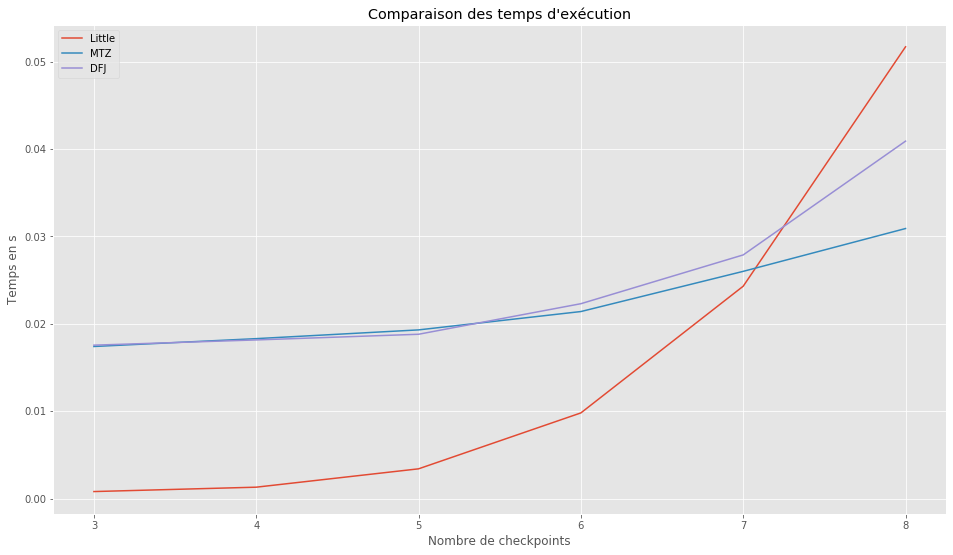

In [47]:
plt.figure(figsize=(16,9))
plt.style.use('ggplot')
plt.ylabel('Temps en s')
plt.xlabel('Nombre de checkpoints')
plt.title("Comparaison des temps d'exécution")
plt.plot(xLittle,littleArray,xMtz,mtzArray,xDfj,dfjArray)
plt.legend(['Little','MTZ','DFJ'])
plt.savefig('./results/20-8.png')

<h1 style="color:red;" >AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA</h1>
<h1 style="color:red;" >AAAAA Blablater les résulats AAAAA</h1>
<h1 style="color:red;" >AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA</h1>

<img src="./results/20-8.png" alt="drawing" width="1000"/>

___ 

<img src="./results/20-12.png" alt="drawing" width="1000"/>

___

<img src="./results/3_200.png" alt="drawing" width="1000"/>

___

<img src="./results/3_200-zoom-MTZ.png" alt="drawing" width="1000"/>

## A smarter approach ? 

___

D'après ce que nous avons pu voir ci-dessus, la modélisation DFJ de notre problème était ridiculement peu performante. En éliminant de manière systématique tous le sous circuits possibles, on se retrouve avec ~2^n contraintes pour un problème à n sommets. 

Cependant, le problème que nous étudions est particulièrement vide : Chaque sommet ne peut accèder qu'à un nombre réduit de voisins. Ainsi, l'immense majorité des sous-circuits sur lesquels nous itérons sont impossibles.

Aussi, nous mettons ici en place une nouvelle approche du problème, où nous résolvons le problème sans contraintes d'éliminations de sous-circuits, puis éliminons tous les sous circuits trouvés. Cette méthode ne permet pas d'éliminer tous le sous circuits possibles mais uniquement les sous cicruits potentiellement intéressants.

In [48]:
def solveILP_T(nodes, costs , maxi):
    
    isProblemSolved = False
    forbiddenSubtours = []
    
    distances = dict(((i,j),costs[i,j]) for i in nodes for j in nodes if i!=j and costs[i,j] != maxi )
    
    while not isProblemSolved :

        prob = LpProblem('TrackmaniaSalesmanProblem', LpMinimize) #Define the problem

        x = LpVariable.dicts('x',distances, 0,1,LpBinary) #Decision variables

        #The objective
        cost = lpSum([x[(i,j)]*distances[(i,j)] for (i,j) in distances])
        prob+=cost

        #Constraints
        for k in nodes:
            #every site has exactly one inbound connection
            prob+= lpSum([ x[(i,k)] for i in nodes if (i,k) in x]) ==1
            #every site has exactly one outbound connection
            prob+=lpSum([ x[(k,i)] for i in nodes if (k,i) in x]) ==1


        #Subtour elimination         
        for subtour in forbiddenSubtours:
            prob += lpSum([ x[(i,j)] for (i,j) in subtour]) <= len(subtour)-1

        %time prob.solve()
        print(LpStatus[prob.status])
        
        (isSubtour, subtourList) = detectSubtours(x,nodes)
        
        if not isSubtour:
            isProblemSolved = True
        else:
            #print('> Subtours eliminated')
            for subtourFound in subtourList:
                forbiddenSubtours.append([(i,j) for (i,j) in subtourFound ])

    #Best tour print
    nodes_left = nodes.copy()
    org = 0
    tour=[]
    tour.append(nodes_left.pop( nodes_left.index(org)))
    
    final_cost = 0 
    
    while len(nodes_left) > 0:

        for k in nodes_left:
            try :
                if x[(org,k)].varValue ==1:
                    tour.append( nodes_left.pop( nodes_left.index(k)))
                    final_cost += costs[org,k]
                    org=k
                    break
            except:
                pass

    tour.append(0)

    tour_legs = [distances[(tour[i-1], tour[i])] for i in range(1,len(tour))]

    print('Found optimal tour!')
    tour_str = [str(tour[i]) for i in range(len(tour))]
    print(' -> '.join(tour_str))
    print('Total cost : {}s'.format(final_cost))

In [49]:
def detectSubtours(x,nodes):
    
    isSubtour = False

    nodes_left = nodes.copy()
    start = 0
    org = 0
    subtour0=[]
    subtourList=[]


    while len(nodes_left) > 0 and not isSubtour:

        for k in nodes_left:
            try :
                if x[(org,k)].varValue ==1:
                    
                    nodes_left.pop( nodes_left.index(k))
                    subtour0.append((org,k))
                    org=k

                    if k==start and len(subtour0)<len(nodes):
                        isSubtour = True
                    break
            except:
                pass
    
    while len(nodes_left)>0:  
        
        start = nodes_left[0]
        org = nodes_left[0]
        nodes_left.append(nodes_left[0])
        new_subtour = []
        last=0
        
        #print("Start : ", start)
        #print(nodes_left)
        
        while last != start:
            for k in nodes_left:
                try :
                    if x[(org,k)].varValue ==1:
                        
                        #print("(",org,",",k,")")
                        
                        nodes_left.pop( nodes_left.index(k))
                        new_subtour.append((org,k))
                        org=k
                        last=k
                        
                        if k==start:
                            nodes_left.pop( nodes_left.index(start))
                            break
                except:
                    pass
                
        subtourList.append(new_subtour)

    subtourList.append(subtour0)
    
    if not isSubtour:
        #print("> No subtours")
        return(False, [])
    else:
        #print("> Subtours")
        #print(subtourList)
        return(True, subtourList)

### >> Toy example

In [50]:
nodes = [i for i in range(8)]
maxi = np.inf
costs = np.array([[maxi,10,maxi,maxi,maxi,maxi,maxi,maxi],
                 [maxi,maxi,10,25,maxi,maxi,maxi,maxi],
                 [maxi,10,maxi,15,1,7,maxi,maxi],
                 [maxi,25,15,maxi,5,maxi,4,maxi],
                 [maxi,maxi,5,5,maxi,1,20,maxi],
                 [maxi,maxi,1,maxi,15,maxi,5,6],
                 [maxi,maxi,maxi,4,20,5,maxi,10],
                 [0,maxi,maxi,maxi,maxi,maxi,maxi,maxi]])

In [51]:
start = time.time()
solveILP_T(nodes, costs, maxi)
end = time.time()
print("Execution Time : ", end-start, 's')

Wall time: 19 ms
Optimal
Wall time: 21 ms
Optimal
Found optimal tour!
0 -> 1 -> 2 -> 4 -> 3 -> 6 -> 5 -> 7 -> 0
Total cost : 41.0s
Execution Time :  0.04301023483276367 s


### >> Trackmania example

In [52]:
maxi = 30
data = pd.read_excel('Données checkpoints E02.xlsx', index_col=0)[0:27].fillna(maxi)
data[data == 0.00] = maxi
data.iloc[26][0] = 0
costs = data.values
nodes = [i for i in range(27)]

In [53]:
start = time.time()
solveILP_T(nodes, costs, maxi)
end = time.time()
print("Execution Time : ", end-start, 's')

Wall time: 30 ms
Optimal
Wall time: 52 ms
Optimal
Wall time: 65 ms
Optimal
Wall time: 70 ms
Optimal
Found optimal tour!
0 -> 5 -> 2 -> 14 -> 24 -> 23 -> 3 -> 1 -> 4 -> 7 -> 12 -> 9 -> 10 -> 11 -> 8 -> 18 -> 19 -> 17 -> 20 -> 13 -> 16 -> 21 -> 22 -> 6 -> 15 -> 25 -> 26 -> 0
Total cost : 177.07999999999998s
Execution Time :  0.2360532283782959 s


**Conclusion :** Nous avons ici pu vérifier que cette nouvelle modélisation fonctionnait bien sur nos deux problèmes de référence. Nos résultats sont cohérents avec ceux retournés par les autres algorithmes et la résolution semble plus rapide ! 

Là où la modélisation Miller-Tucker-Zemlin prenait 1,30s pour résoudre notre problème, cette nouvelle approche ne prends pas plus de 0,25s.

Nous allons maintenant comparer l'efficacité de cette nouvelle modélisation avec la modélisation Miller-Tucker-Zemlin, qui était notre référence de performance jusqu'alors, sur différentes tailles de circuit.

### >> Constants

nSamples = 10
nNodes = 200
time_limit = 60

### >> Generate cost matrices

for idx in range(nSamples):
    for n in range(3, nNodes+1):
        costs = generateCosts(n)
        np.savetxt("./matrices/{}-{}-MTZvsDFJ.csv".format(idx,n), costs, delimiter=";")

### >> Timing ILP-MTZ

isMtzDying = False
mtzResults = np.zeros(nSamples*(nNodes-2)).reshape(nSamples, nNodes-2)
previous_time = 0

for idx in range(nSamples):
    for n in range(3,nNodes+1):
        
        if not isMtzDying:
            
            print("N° échantillon : {} | Nombre de noeuds : {}".format(idx,n))
            
            costs = np.genfromtxt('./matrices/{}-{}-MTZvsDFJ.csv'.format(idx,n), delimiter=';')
            #costs = np.array(costs, dtype=float)
            #costs = np.nan_to_num(costs, nan=np.inf)

            nodes = [i for i in range(n)]
            maxi = np.inf

            start = time.time()
            solveILP_MTZ(nodes, costs, maxi)
            end = time.time()
            
            if(end-start > time_limit and previous_time>time_limit):
                mtzResults[idx, n-3] = end-start
                isMtzDying = True
            else:
                mtzResults[idx, n-3] = end-start
            previous_time = end-start
            print("-> Temps : {}s".format(end-start))
            
    isMtzDying = False
    
np.savetxt("./results/ILP-MTZ-{}-{}-DUEL.csv".format(nSamples,nNodes), mtzResults, delimiter=";")

### >> Timing ILP-DFJ

isDfjDying = False
dfjResults = np.zeros(nSamples*(nNodes-2)).reshape(nSamples, nNodes-2)

for idx in range(nSamples):
    for n in range(3,nNodes+1):
        
        if not isDfjDying:
            
            print("N° échantillon : {} | Nombre de noeuds : {}".format(idx,n))
            
            costs = np.genfromtxt('./matrices/{}-{}-MTZvsDFJ.csv'.format(idx,n), delimiter=';')
            #costs = np.array(costs, dtype=float)
            #costs = np.nan_to_num(costs, nan=np.inf)

            nodes = [i for i in range(n)]
            maxi = np.inf

            start = time.time()
            solveILP_T(nodes, costs, maxi)
            end = time.time()
            
            if(end-start > time_limit and previous_time>time_limit):
                dfjResults[idx, n-3] = end-start
                isDfjDying = True
            else:
                dfjResults[idx, n-3] = end-start
            print("-> Temps : {}s".format(end-start))
            
            np.savetxt("./results/ILP-DFJ-{}-{}-DUEL.csv".format(nSamples,nNodes), dfjResults, delimiter=";")
            
    isDfjDying = False
    
np.savetxt("./results/ILP-DFJ-{}-{}-DUEL.csv".format(nSamples,nNodes), dfjResults, delimiter=";")

In [54]:
costs = generateCosts(200)
nodes = [i for i in range(200)]
maxi = np.inf

In [55]:
start = time.time()
solveILP_T(nodes, costs, maxi)
end = time.time()

print("\n Execution Time : ",end-start, "s")

Wall time: 742 ms
Optimal
Wall time: 2.27 s
Optimal
Found optimal tour!
0 -> 21 -> 173 -> 85 -> 80 -> 121 -> 22 -> 140 -> 30 -> 169 -> 118 -> 7 -> 6 -> 39 -> 150 -> 129 -> 103 -> 102 -> 164 -> 123 -> 112 -> 187 -> 47 -> 66 -> 158 -> 63 -> 81 -> 113 -> 186 -> 26 -> 190 -> 162 -> 25 -> 27 -> 182 -> 181 -> 68 -> 153 -> 12 -> 167 -> 50 -> 46 -> 163 -> 77 -> 51 -> 105 -> 160 -> 106 -> 59 -> 117 -> 15 -> 14 -> 175 -> 196 -> 198 -> 180 -> 89 -> 193 -> 83 -> 74 -> 17 -> 128 -> 60 -> 152 -> 146 -> 191 -> 147 -> 95 -> 94 -> 42 -> 194 -> 49 -> 120 -> 41 -> 188 -> 31 -> 90 -> 108 -> 144 -> 8 -> 86 -> 37 -> 20 -> 19 -> 18 -> 136 -> 135 -> 151 -> 67 -> 44 -> 64 -> 185 -> 174 -> 149 -> 36 -> 71 -> 132 -> 172 -> 171 -> 13 -> 62 -> 109 -> 82 -> 10 -> 107 -> 166 -> 141 -> 70 -> 56 -> 122 -> 127 -> 69 -> 11 -> 55 -> 104 -> 154 -> 124 -> 32 -> 76 -> 75 -> 38 -> 126 -> 125 -> 137 -> 179 -> 178 -> 192 -> 79 -> 96 -> 155 -> 189 -> 168 -> 97 -> 119 -> 58 -> 111 -> 40 -> 61 -> 73 -> 43 -> 170 -> 130 -> 176 -> 

N = [5*n for n in range(1,40)]

maxi = np.inf
time_limit = 40 #s


isMTZdying = False
isDFJdying = False

results_MTZ = []
results_DFJ = []

for n in N:
    
    costs = generateCosts(n)
    nodes = [i for i in range(n)]
    
    if not isMTZdying:
        start = time.time()
        solveILP_MTZ(nodes, costs,maxi)
        end = time.time()
        
        results_MTZ.append(end-start)
        print('n : {} | MTZ | {}s'.format(n,end-start))
    
    if end-start > time_limit and results_MTZ[len(results_MTZ)-2] > time_limit:
        isMTZdying = True
    
    
    if not isDFJdying:
        start = time.time()
        solveILP_T(nodes, costs,maxi)
        end = time.time()
        
        results_DFJ.append(end-start)
        print('n : {} | DFJ_bis | {}s'.format(n,end-start))
    
    if end-start > time_limit and results_DFJ[len(results_DFJ)-2] > time_limit:
        isDFJdying = True
    

while len(results_MTZ) != len(N):
    results_MTZ.append(100)

plt.figure(figsize=(16,9))
plt.style.use('ggplot')
plt.ylabel('Temps en s')
plt.xlabel('Nombre de checkpoints')
plt.title("Comparaison des temps d'exécution")
plt.xticks(N)
plt.ylim(0,70)
plt.plot(N, results_MTZ, N, results_DFJ)
plt.legend(['MTZ','DFJ'])
plt.savefig('./results/DUEL.png')

<img src="./results/DUEL.png" alt="drawing" width="1000"/>

**Conclusion :** On peut sans trop de risques conclure que cette nouvelle aproche est plus efficace que l'approche Miller Tucker Zemlin